In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f

data = pd.read_excel("vgsales.xlsx")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [2]:
data.isna().sum() / data.shape[0] * 100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [3]:
data_new = data.dropna()
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
data_new['NA_Sales'].describe()


count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

<Axes: xlabel='Genre', ylabel='Count'>

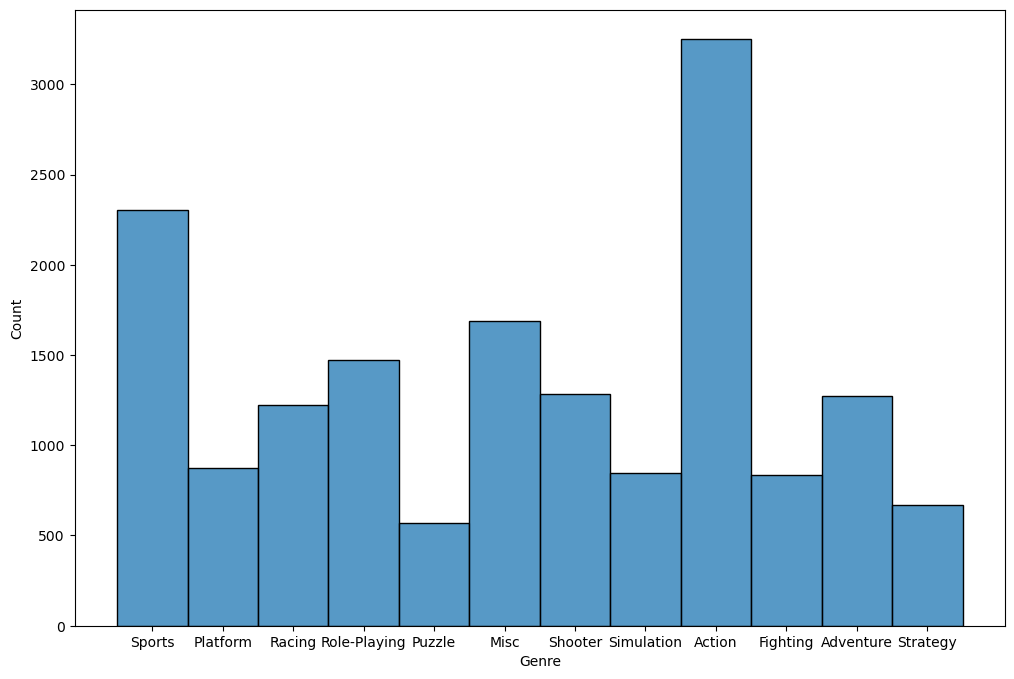

In [5]:
plt.figure(figsize=(12,8))
sns.histplot(data_new['Genre'])

([], [])

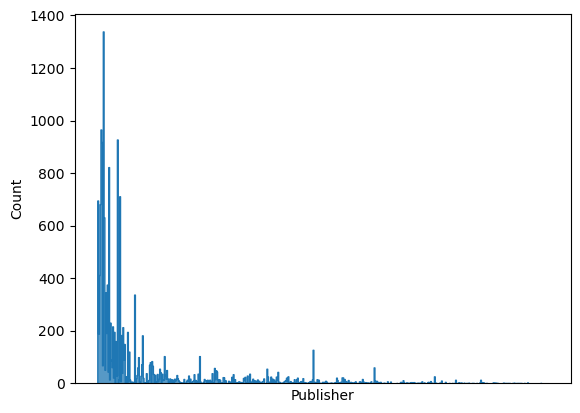

In [6]:
data_new['Publisher'].describe()
sns.histplot(data_new['Publisher'], bins=10, element="step", binwidth=6, kde=False)
plt.xticks([])

In [7]:
data_new['EU_Sales'].describe()

count    16291.000000
mean         0.147731
std          0.509303
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [8]:
data_new['NA_Sales'].describe()

count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [9]:
data_new['JP_Sales'].describe()

count    16291.000000
mean         0.078833
std          0.311879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [10]:
data_new['Global_Sales'].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

<Axes: xlabel='Year', ylabel='Count'>

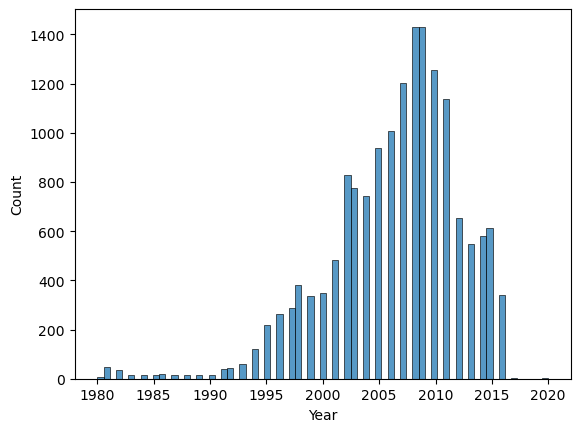

In [11]:
sns.histplot(data_new['Year'])

<Axes: xlabel='Rank', ylabel='Count'>

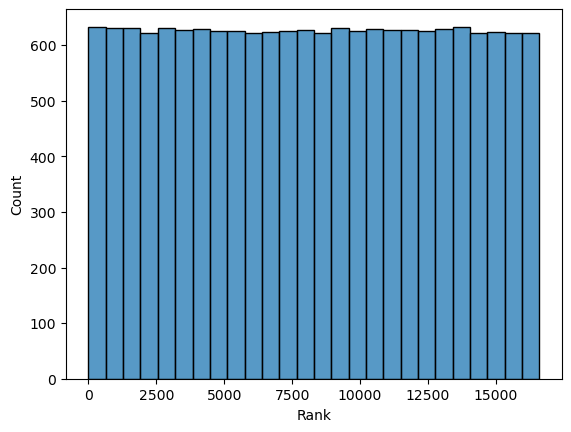

In [12]:
data_new['Rank'].describe()
sns.histplot(data_new['Rank'])

<Axes: xlabel='NA_Sales', ylabel='Count'>

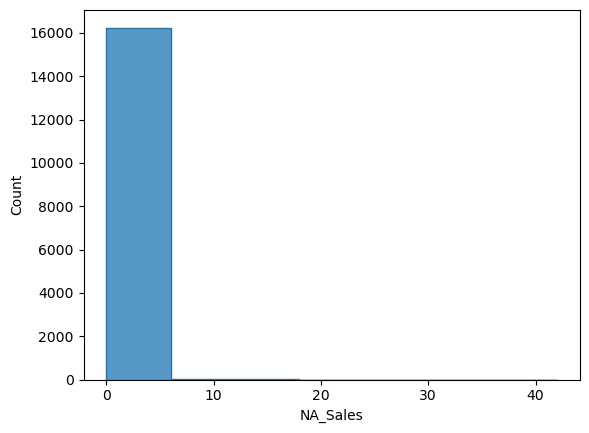

In [13]:
data_new['NA_Sales'].describe()
sns.histplot(data_new['NA_Sales'], bins=10, element="step", binwidth=6, kde=False)

<Axes: xlabel='EU_Sales', ylabel='Count'>

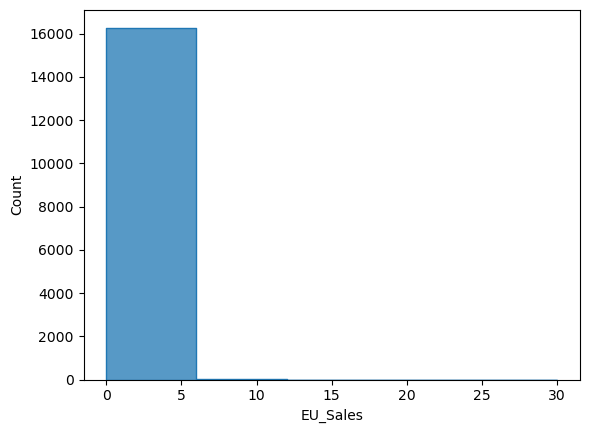

In [14]:
data_new['EU_Sales'].describe()
sns.histplot(data_new['EU_Sales'], bins=10, element="step", binwidth=6, kde=False)

<Axes: xlabel='JP_Sales', ylabel='Count'>

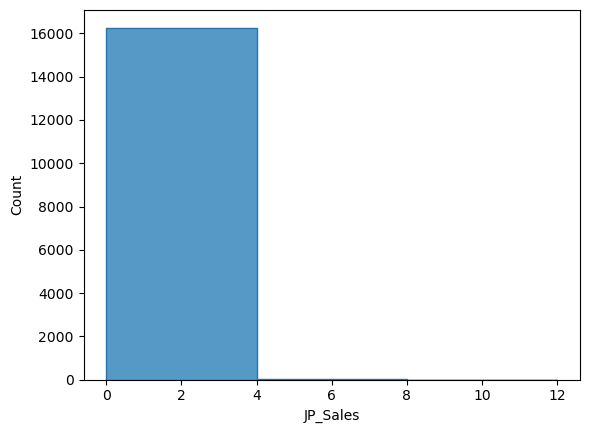

In [15]:
data_new['JP_Sales'].describe()
sns.histplot(data_new['JP_Sales'], bins=10, element="step", binwidth=4, kde=False)

<Axes: xlabel='Other_Sales', ylabel='Count'>

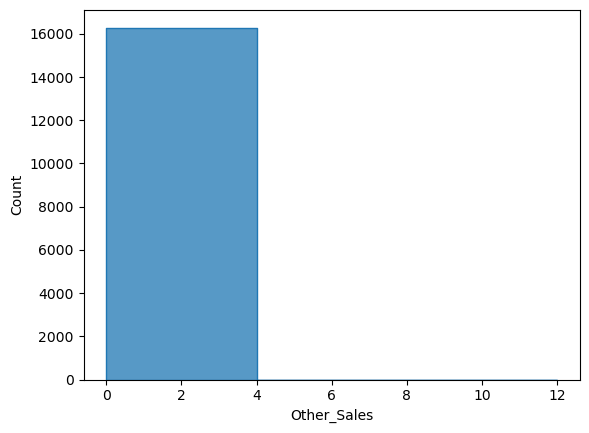

In [16]:
data_new['Other_Sales'].describe()
sns.histplot(data_new['Other_Sales'], bins=10, element="step", binwidth=4, kde=False)

<Axes: xlabel='Global_Sales', ylabel='Count'>

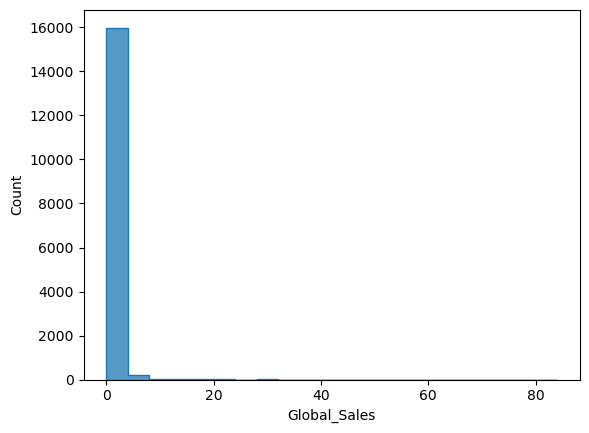

In [17]:
data_new['Global_Sales'].describe()
sns.histplot(data_new['Global_Sales'], bins=10, element="step", binwidth=4, kde=False)

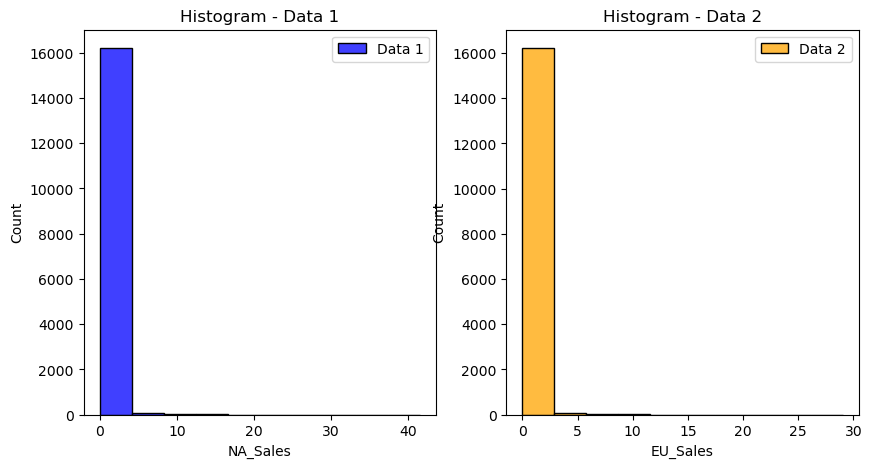

In [18]:
# İki histogramı yan yana göster
plt.figure(figsize=(10, 5))

# İlk histogram
plt.subplot(1, 2, 1)
sns.histplot(data_new['NA_Sales'], bins=10, kde=False, color='blue', label='Data 1')
plt.title('Histogram - Data 1')
plt.legend()

# İkinci histogram
plt.subplot(1, 2, 2)
sns.histplot(data_new['EU_Sales'], bins=10, kde=False, color='orange', label='Data 2')
plt.title('Histogram - Data 2')
plt.legend()

# Grafikleri göster
plt.show()

In [19]:
data_new['Platform'].describe()

count     16291
unique       31
top          DS
freq       2131
Name: Platform, dtype: object

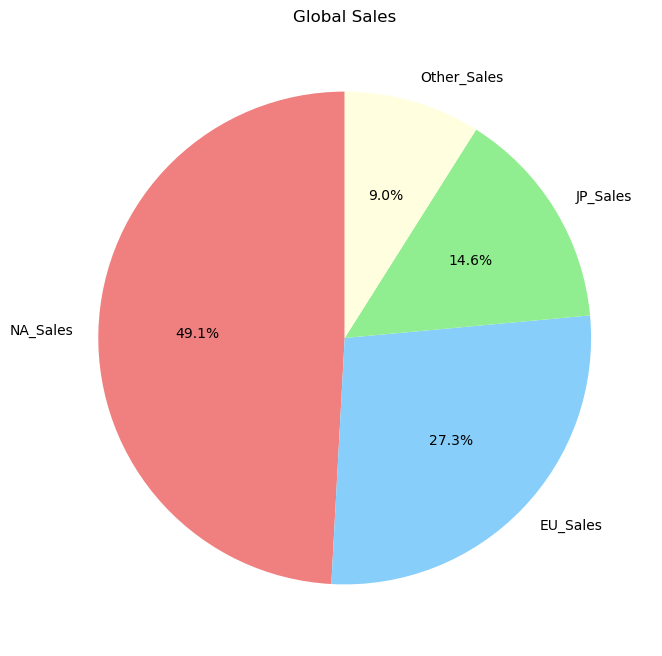

In [20]:
total_sales = data_new[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow'])
plt.title('Global Sales')
plt.show()

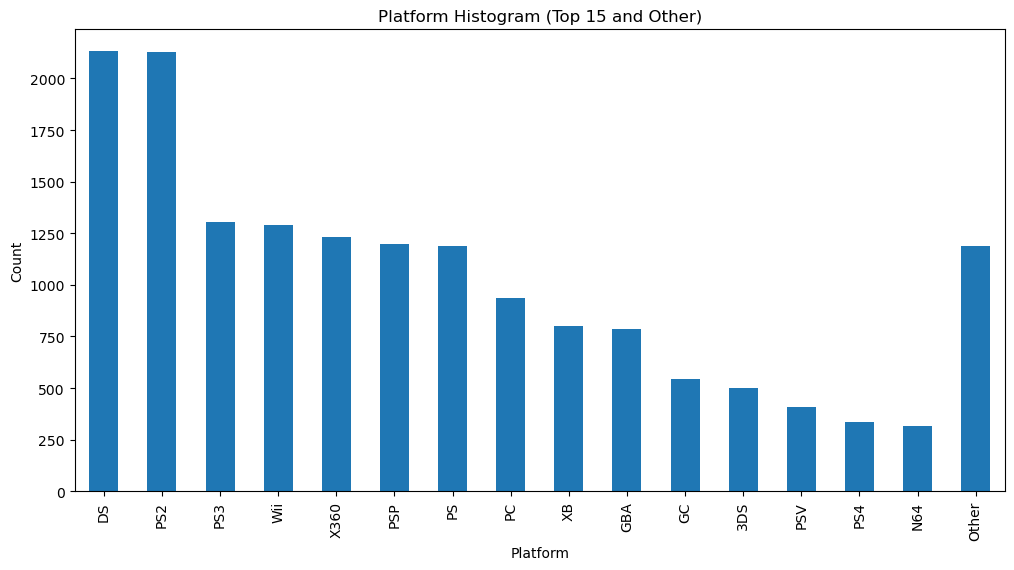

In [21]:
platform_counts = data_new['Platform'].value_counts()
top_platforms = platform_counts.head(15)
other_platforms = pd.Series(platform_counts[15:].sum(), index=['Other'])
final_platforms = pd.concat([top_platforms, other_platforms])
plt.figure(figsize=(12, 6))
final_platforms.plot(kind='bar')
plt.title('Platform Histogram (Top 15 and Other)')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

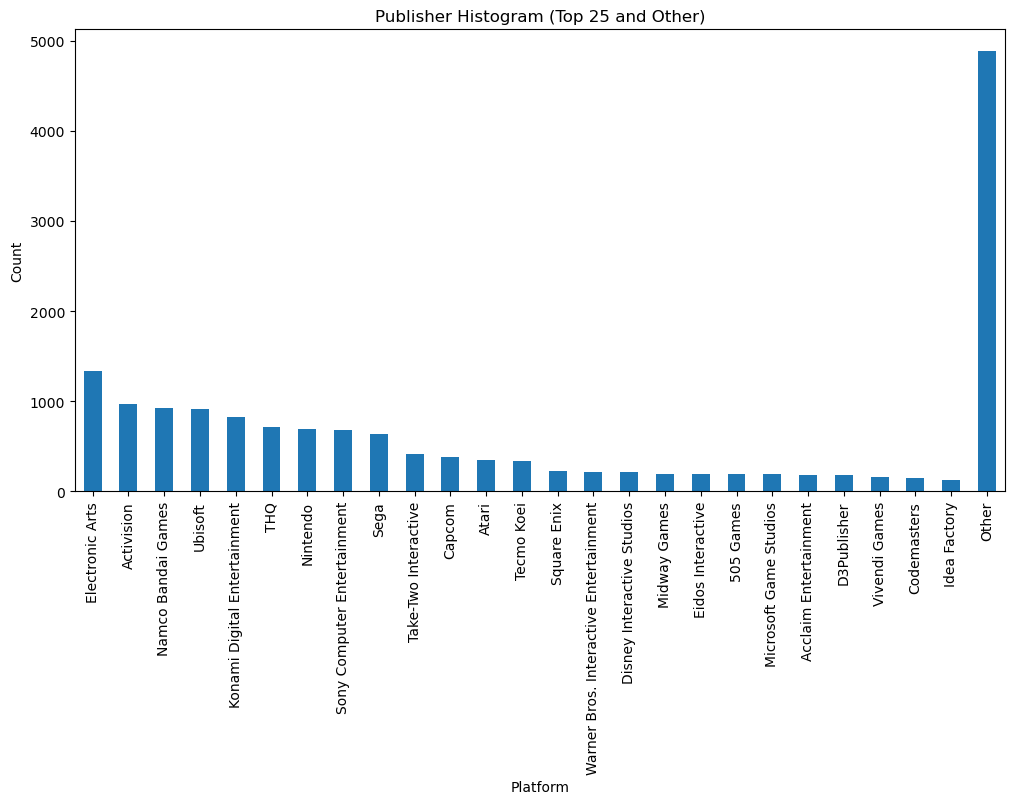

In [22]:
platform_counts = data_new['Publisher'].value_counts()
top_platforms = platform_counts.head(25)
other_platforms = pd.Series(platform_counts[25:].sum(), index=['Other'])
final_platforms = pd.concat([top_platforms, other_platforms])
plt.figure(figsize=(12, 6))
final_platforms.plot(kind='bar')
plt.title('Publisher Histogram (Top 25 and Other)')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

In [23]:
data_new['Publisher'].describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

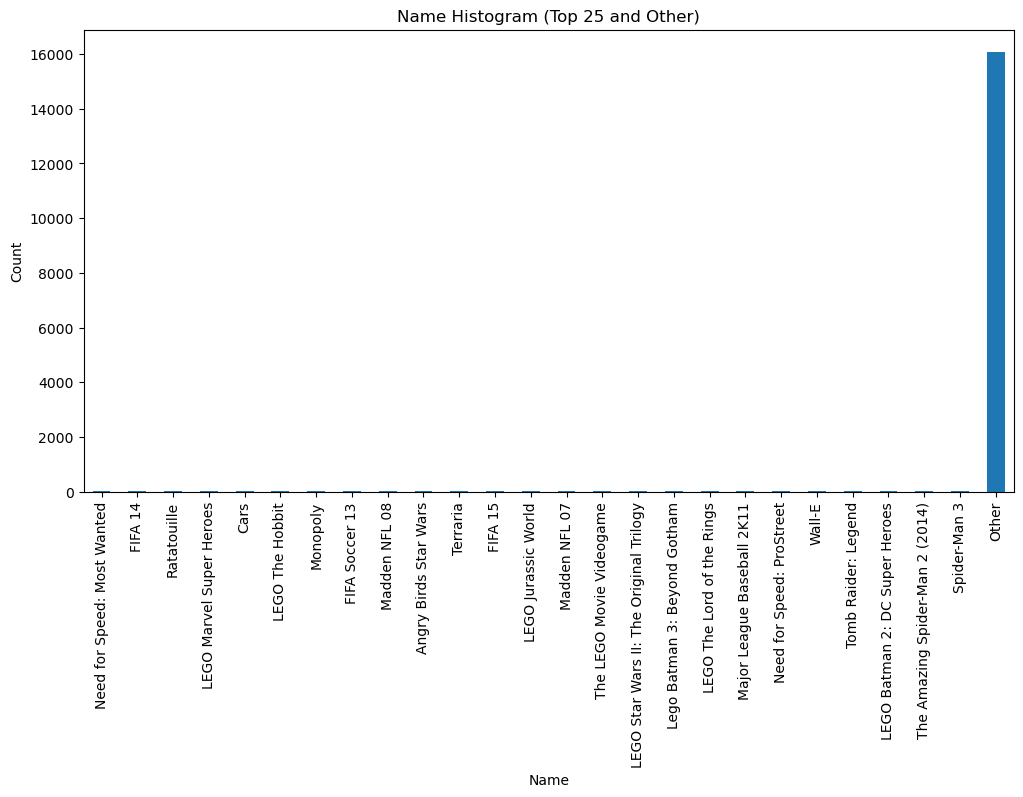

In [24]:
platform_counts = data_new['Name'].value_counts()
top_platforms = platform_counts.head(25)
other_platforms = pd.Series(platform_counts[25:].sum(), index=['Other'])
final_platforms = pd.concat([top_platforms, other_platforms])
plt.figure(figsize=(12, 6))
final_platforms.plot(kind='bar')
plt.title('Name Histogram (Top 25 and Other)')
plt.xlabel('Name')
plt.ylabel('Count')
plt.show()

In [25]:
data_new['Genre'].describe()
unique_genre = data_new['Genre'].unique()
print()
for genre in unique_genre:
    print(genre)


Sports
Platform
Racing
Role-Playing
Puzzle
Misc
Shooter
Simulation
Action
Fighting
Adventure
Strategy


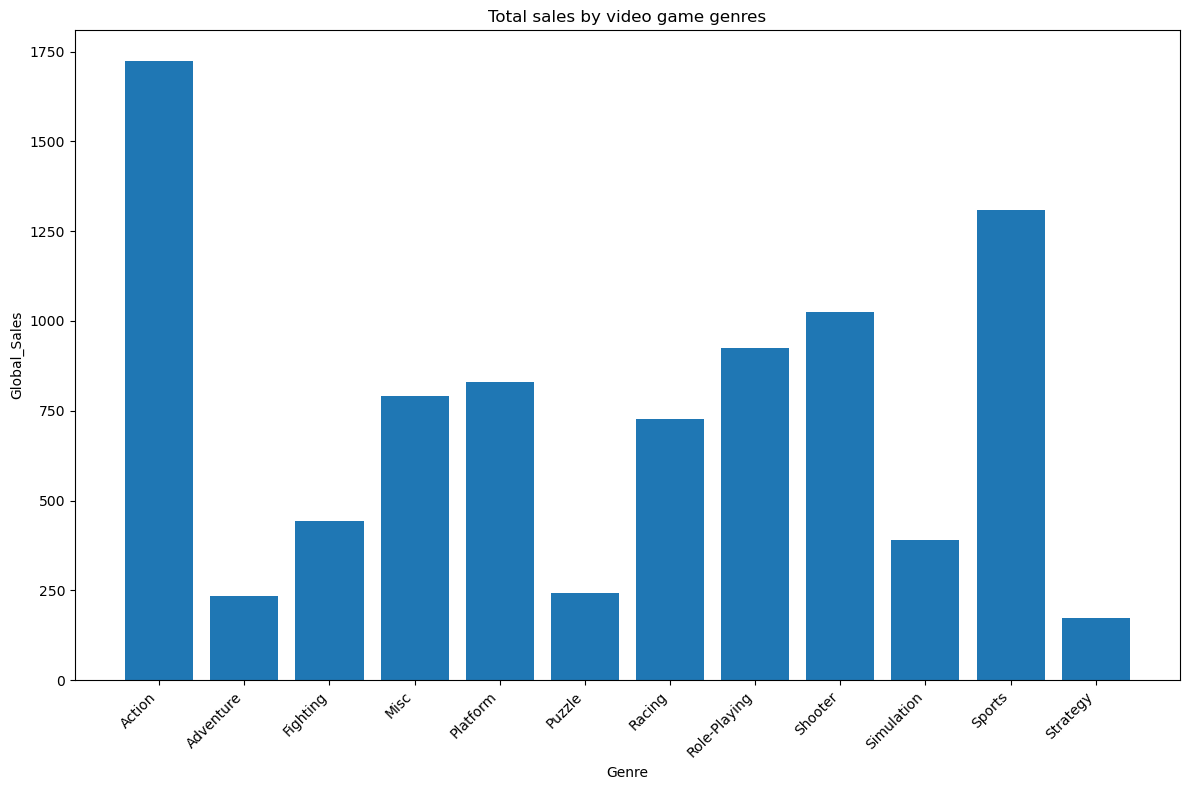

In [26]:
genre_sales = data_new.groupby('Genre')['Global_Sales'].sum().reset_index()

# Grafik oluştur
plt.figure(figsize=(12, 8))
plt.bar(genre_sales['Genre'], genre_sales['Global_Sales'])
plt.title('Total sales by video game genres')
plt.xlabel('Genre')
plt.ylabel('Global_Sales')
plt.xticks(rotation=45, ha='right')  # Eksen etiketlerini döndür ve sağa hizala
plt.tight_layout()

# Grafik göster
plt.show()

In [27]:
genre_sales = data_new.groupby('Genre')['Global_Sales'].sum().reset_index()
sales_by_genre = [data_new[data_new['Genre'] == genre]['Global_Sales'].values for genre in genre_sales['Genre']]

# between-group variance
inter_group_variance = np.var(genre_sales['Global_Sales'])

# within-group variance
intra_group_variances = [np.var(sales) for sales in sales_by_genre]

print('between-group variance:', inter_group_variance)
print('within-group variance:', intra_group_variances)

between-group variance: 204204.23317430555
within-group variance: [1.3573618237144647, 0.26081609123663957, 0.9165040365090085, 1.7735708441509106, 6.751960072620409, 2.4843456968297946, 2.8112827537859233, 2.947633465731871, 3.359386520428055, 1.456163665339089, 4.428792237835166, 0.2747680732902651]


In [28]:
inter_group_variance = np.var(genre_sales['Global_Sales'])
intra_group_variances = [np.var(sales) for sales in sales_by_genre]

num_groups = len(genre_sales)
group_sizes = [len(sales) for sales in sales_by_genre]

# Weighted average of variances within groups
weighted_mean_intra_group_variance = np.average(intra_group_variances, weights=group_sizes)

# F value
f_value = inter_group_variance / weighted_mean_intra_group_variance
print('F Value:', f_value)

F Value: 84151.90321020331


In [29]:
# p value
p_value = 1 - f.cdf(f_value, intra_group_variances, inter_group_variance)
print('P value:', p_value)

P value: [1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16]


C:\Users\user\AppData\Local\Temp\ipykernel_26448\311050411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Global_Sales'] = data_new['NA_Sales'] + data_new['EU_Sales'] + data_new['JP_Sales'] + data_new['Other_Sales']


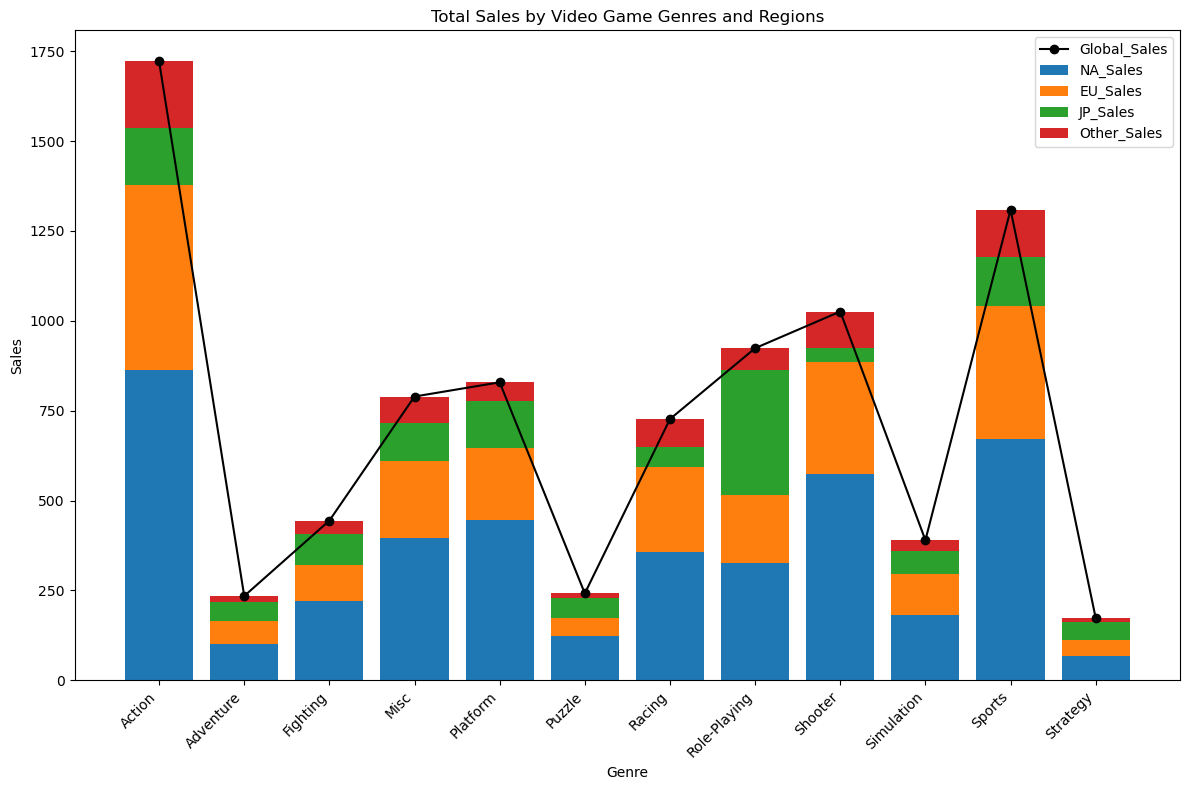

In [30]:


# Toplam satışları hesapla
data_new['Global_Sales'] = data_new['NA_Sales'] + data_new['EU_Sales'] + data_new['JP_Sales'] + data_new['Other_Sales']

# Genre bazında toplam satışları hesapla
genre_sales = data_new.groupby('Genre')['Global_Sales'].sum().reset_index()

# Grafik oluştur
plt.figure(figsize=(12, 8))

# Her bir satış türü için ayrı çubuk grafiği ekle
plt.bar(genre_sales['Genre'], data_new.groupby('Genre')['NA_Sales'].sum(), label='NA_Sales')
plt.bar(genre_sales['Genre'], data_new.groupby('Genre')['EU_Sales'].sum(), bottom=data_new.groupby('Genre')['NA_Sales'].sum(), label='EU_Sales')
plt.bar(genre_sales['Genre'], data_new.groupby('Genre')['JP_Sales'].sum(), bottom=data_new.groupby('Genre')['NA_Sales'].sum() + data_new.groupby('Genre')['EU_Sales'].sum(), label='JP_Sales')
plt.bar(genre_sales['Genre'], data_new.groupby('Genre')['Other_Sales'].sum(), bottom=data_new.groupby('Genre')['NA_Sales'].sum() + data_new.groupby('Genre')['EU_Sales'].sum() + data_new.groupby('Genre')['JP_Sales'].sum(), label='Other_Sales')

# Toplam satışları göstermek için çizgi grafiği ekle
plt.plot(genre_sales['Genre'], genre_sales['Global_Sales'], color='black', marker='o', label='Global_Sales')

# Grafik başlığı ve etiketleri
plt.title('Total Sales by Video Game Genres and Regions')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Eksen etiketlerini döndür ve sağa hizala
plt.legend()
plt.tight_layout()

# Grafik göster
plt.show()


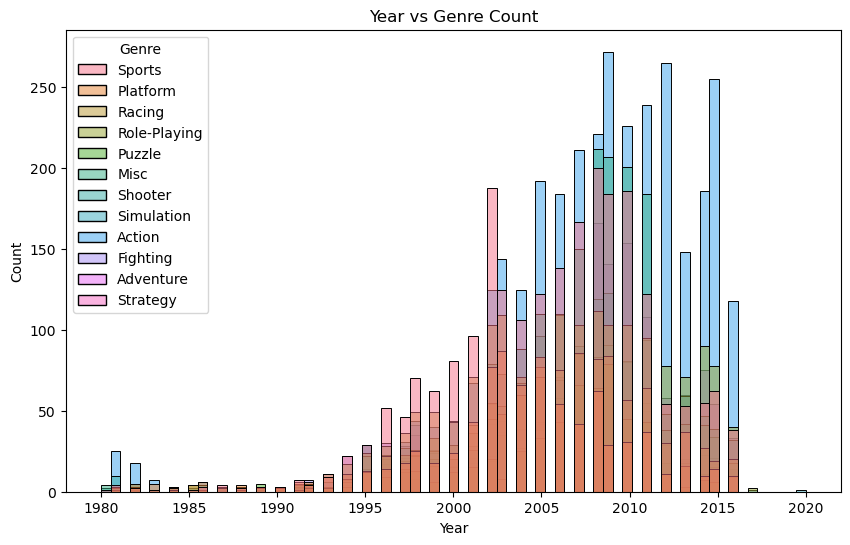

In [31]:

# Bar plot
plt.figure(figsize=(10, 6))
sns.histplot(x=data_new['Year'], hue=data_new['Genre'], data=data_new)
plt.title('Year vs Genre Count')
plt.show()


In [32]:
data_new['Global_Sales'] = data_new[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# within-group variance
grouped_within_var = data_new[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].var()

# between-group variance
overall_var = data_new[['Global_Sales']].var()

print("within-group variance:")
print(grouped_within_var)
print("\nbetween-group variance:")
print(overall_var)

within-group variance:
NA_Sales       0.676395
EU_Sales       0.259389
JP_Sales       0.097269
Other_Sales    0.036131
dtype: float64

between-group variance:
Global_Sales    2.456932
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_26448\4170925639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Global_Sales'] = data_new[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)


In [33]:
from scipy.stats import f_oneway
data_new['Global_Sales'] = data_new[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# ANOVA test
f_statistic, p_value = f_oneway(
    data_new['NA_Sales'],
    data_new['EU_Sales'],
    data_new['JP_Sales'],
    data_new['Other_Sales']
)

print("F-Value:", f_statistic)
print("P-Value:", p_value)

F-Value: 566.4104046503171
P-Value: 0.0


C:\Users\user\AppData\Local\Temp\ipykernel_26448\2149036150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Global_Sales'] = data_new[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)


In [34]:
data_new['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [35]:
data_new['Genre'].describe()

count      16291
unique        12
top       Action
freq        3251
Name: Genre, dtype: object